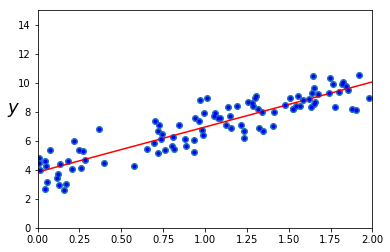

array([[ 3.84295772],
       [10.0651796 ]])

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X,y)
plt.axis([0, 2, 0, 15])
plt.ylabel("$y$", rotation=0, fontsize=18)       #$sign just making it itlaics

#understanding linear regression. Normal Equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#using sklearn for the same as above
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

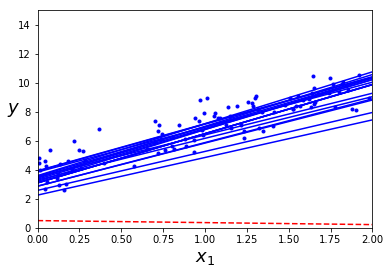

In [33]:
#understanding batch descent vs Stochastic gradient descend

#batch descent. takes the whoel training set in each iteration
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

    
#stochastic from scratch with variable eta
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown                          # not shown
plt.show()  

#-----------builtin for stochastic using sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

#-------mini batch descent
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)



(array([1.9735233]), array([[0.95038538, 0.52577032]]))

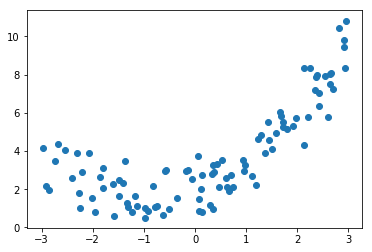

In [34]:
#generating quadratic tdata for polynomial regression
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

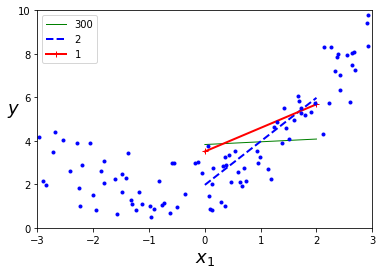

In [35]:
#for plotting the regressor curve of different models
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


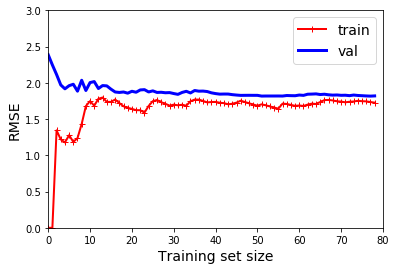

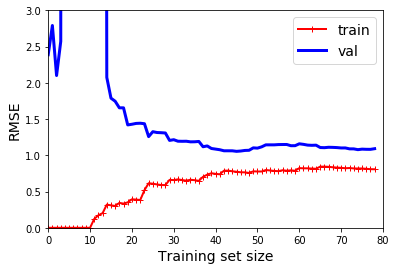

In [41]:
#plotting learing curves (first is underfitting because rmse is high and train/test is same)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()  

    
# #overfitting 
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()  

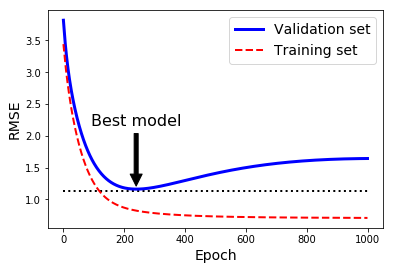

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=True)

In [42]:
#regularizations

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

d_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

#lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

#lasso using sklearn and SGD
d_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])
 
# #Elastic net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

#Early stopping
from sklearn.base import clone
np.random.seed(42)


m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, penalty=None,  eta0=0.0005, warm_start=True,learning_rate="constant",
                       random_state=42)


minimum_val_error = float("inf")
best_epoch = None
best_model = None

n_epochs = 1000
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

#best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

best_model

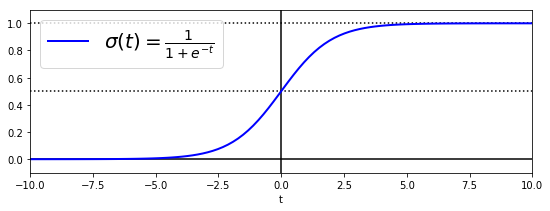

In [43]:
#plotting sigmoid

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()



array([1, 0])

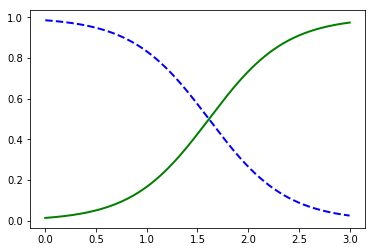

In [44]:
#Decision boundaries
from sklearn import datasets
iris = datasets.load_iris()

X =  iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear",random_state=42)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

#to see where the line is for the two classes
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

log_reg.predict([[1.7], [1.5]])



In [45]:
#softmax regression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

softmax_reg.predict_proba([[5,2]])


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [51]:
#question 12
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import datasets
iris = datasets.load_iris()

np.random.seed(2042)

def hotcoding_labels(labels):
    nar = np.zeros((labels.shape[0], n_classes))
    nar[np.arange(labels.shape[0]), labels] = 1
    return nar

def sfmax_func(array_of_scores):
    array_exp = np.exp(array_of_scores)                         #shape 150, 3
    ar_row_sum = np.sum(array_exp, axis = 1, keepdims = True)   #shape = 150, 1
    pk = array_exp / ar_row_sum
    return pk

X = iris["data"][:, (2, 3)]  # petal length, petal width
y_all = iris["target"]

num_samples = X.shape[0]
val_num = np.ceil(0.2 * num_samples).astype(int)
train_num = np.ceil(0.6 * num_samples).astype(int)

#shuffling indices and dividing in train test and validation
shuffle_indices = np.random.permutation(X.shape[0])
X1 = X[shuffle_indices[:train_num]]
X_val = X[shuffle_indices[train_num: train_num + val_num]]
X_test = X[shuffle_indices[train_num + val_num :]]
y = y_all[shuffle_indices[:train_num]]
y_val = y_all[shuffle_indices[train_num: train_num + val_num]]
y_test = y_all[shuffle_indices[train_num + val_num :]]

m = y.shape[0]
n_classes = len(np.unique(y))
n_feats = X1.shape[1] + 1   #adding 1 because we need one column of 1s for theta 0


#we need to change the target label in a way that is understood by the loss equation
labels_encoded = hotcoding_labels(y)
labels_encoded_val = hotcoding_labels(y_val)


X_train = np.c_[np.ones((m, 1)), X1]  # add 1 to each instance at the beginning
X_val = np.c_[np.ones((X_val.shape[0],1)), X_val]
X_test = np.c_[np.ones((X_test.shape[0],1)), X_test]

In [53]:
#epsilon, learning rate values and ridge regression alpha
eta = 0.2
ep = 1e-7
alpha = 0.1

#random seed to get same random theta values
np.random.seed(2042)
thetas = np.random.rand(n_feats ,n_classes)


min_val_error = float('inf')

condition_stop = 3
count = 0
ite = 0
num_iterations = 10000

#keep running until all iterations are over OR until the validation error stops improving. wait condition_stop and if it keeps increasing, STOP
while(count < condition_stop and ite < num_iterations):

    ite = ite + 1
    r_reg = alpha * np.sum(thetas[1:]**2)/2   #theta0 is not regularized
    
    sm_score_train = np.dot(X_train, thetas)
    pk_train = sfmax_func(sm_score_train)
    Jtheta = -np.mean(np.sum(labels_encoded * np.log(pk_train + ep), axis=1)) + r_reg
        
    sm_score_val = np.dot(X_val, thetas)
    pk_val = sfmax_func(sm_score_val)
    Jtheta_val = -np.mean(np.sum(labels_encoded_val * np.log(pk_val + ep), axis=1)) + r_reg
    
    #if the loss of validation is not less for tcondition_stop times, the count will make the while stop
    if Jtheta_val < min_val_error:
        min_val_error = Jtheta_val
        min_thetas = thetas
        count = 0
    else:
        count += 1
    
    print(ite, Jtheta, Jtheta_val)
    error = pk_train - labels_encoded
    newar = []
    
    for i in range(n_classes):
        er = error[:, i].reshape(-1, 1)
        toappend = (np.mean((X_train * er), axis = 0)) 
        newar.append(toappend)
        gradients2 = np.array(newar).T
        
    gradients2 += np.r_[np.zeros((1, n_classes)), alpha * thetas[1:]]
    
    #gradeints = gradients.T   #becuase my way resulted in classes in rows as in 1st row first class theta second row second class theta and so on. taking transpose makes it how it is 
    thetas = thetas - eta * gradients2

#loop ends

1 1.801513213914228 1.7540469939657257
2 1.1173427496477448 1.1060449766507041
3 1.0879145354076445 1.073342570906245
4 1.0712712301917426 1.05327389947563
5 1.055788728081071 1.040763976578206
6 1.040974142003132 1.0251260401933882
7 1.0267415761844911 1.0131391672030114
8 1.0130264656921242 0.9994373076228027
9 0.9997980592488154 0.9878773112573447
10 0.9870281076209745 0.975509990879198
11 0.9746962948660087 0.9644904366763669
12 0.9627839379340754 0.9531714896535477
13 0.9512748139181568 0.9427556468031879
14 0.9401536038864332 0.9323150050075683
15 0.9294060199471648 0.9225202689669456
16 0.9190183499923188 0.912844401257479
17 0.9089774955112152 0.9036607333958597
18 0.899270810968705 0.8946669256614451
19 0.8898861253690691 0.8860696502479046
20 0.8808116736060252 0.8776931736678077
21 0.8720361082459498 0.8696505896375732
22 0.863548464212047 0.861837896616288
23 0.8553381628280603 0.8543155918607451
24 0.8473949901660551 0.8470205782724592
25 0.8397090956726085 0.8399838075432

421 0.5083117389583935 0.5455512422850474
422 0.5082317774356838 0.5454859984445681
423 0.5081522084691246 0.545421096561048
424 0.5080730295616168 0.5453565344688173
425 0.5079942382375168 0.5452923100206061
426 0.5079158320423923 0.5452284210873359
427 0.507837808542786 0.5451648655579147
428 0.5077601653259786 0.5451016413390327
429 0.5076828999997575 0.5450387463549652
430 0.5076060101921885 0.5449761785473735
431 0.5075294935513888 0.5449139358751113
432 0.5074533477453059 0.5448520163140337
433 0.5073775704614971 0.544790417856808
434 0.5073021594069137 0.5447291385127274
435 0.5072271123076865 0.5446681763075272
436 0.5071524269089159 0.5446075292832039
437 0.5070781009744639 0.5445471954978363
438 0.5070041322867489 0.5444871730254098
439 0.5069305186465436 0.5444274599556416
440 0.5068572578727754 0.5443680543938103
441 0.5067843478023294 0.5443089544605859
442 0.5067117862898547 0.5442501582918639
443 0.5066395712075721 0.5441916640385995
444 0.5065677004450857 0.544133469866

730 0.4948864678724943 0.535203630870308
731 0.49486493672444 0.5351890375277697
732 0.49484348781688026 0.5351745134750141
733 0.4948221207993007 0.5351600583978207
734 0.49480083532292707 0.5351456719835195
735 0.4947796310407131 0.5351313539209833
736 0.4947585076073318 0.5351171039006184
737 0.4947374646791641 0.5351029216143555
738 0.49471650191428884 0.5350888067556402
739 0.4946956189724735 0.535074759019426
740 0.49467481551516274 0.535060778102164
741 0.49465409120546944 0.535046863701795
742 0.49463344570816464 0.5350330155177409
743 0.49461287868966713 0.5350192332508956
744 0.49459238981803455 0.5350055166036175
745 0.4945719787629531 0.5349918652797205
746 0.494551645195728 0.5349782789844657
747 0.49453138878927416 0.5349647574245531
748 0.49451120921810643 0.5349513003081134
749 0.49449110615833064 0.5349379073447005
750 0.4944710792876336 0.534924578245282
751 0.4944511282852744 0.5349113127222326
752 0.49443125283207456 0.5348981104893252
753 0.49441145261040975 0.5348

1057 0.49079229513286715 0.5328384025200342
1058 0.4907857093370954 0.5328357864624272
1059 0.4907791463595783 0.5328331867838035
1060 0.49077260611678075 0.5328306034119873
1061 0.4907660885254985 0.5328280362751068
1062 0.4907595935028568 0.5328254853015935
1063 0.49075312096630913 0.5328229504201797
1064 0.49074667083363543 0.5328204315598988
1065 0.4907402430229411 0.5328179286500823
1066 0.4907338374526549 0.5328154416203594
1067 0.4907274540415288 0.5328129704006559
1068 0.49072109270863457 0.5328105149211921
1069 0.49071475337336445 0.5328080751124824
1070 0.4907084359554284 0.5328056509053328
1071 0.49070214037485327 0.5328032422308409
1072 0.4906958665519811 0.5328008490203935
1073 0.49068961440746817 0.5327984712056668
1074 0.49068338386228294 0.5327961087186233
1075 0.49067717483770545 0.5327937614915117
1076 0.4906709872553254 0.5327914294568658
1077 0.4906648210370413 0.5327891125475022
1078 0.49065867610505864 0.5327868106965199
1079 0.49065255238188865 0.5327845238372994

In [58]:
#now lets see the accuracy on training ,validations sets and testing

thetas = min_thetas
sm_score_train = np.dot(X_train, thetas)
pk_train = sfmax_func(sm_score_train)
y_pred = np.argmax(pk_train, axis = 1)
print('accuracy of training:', np.mean(y_pred == y))

sm_score_val = np.dot(X_val, thetas)
pk_val = sfmax_func(sm_score_val)
y_pred = np.argmax(pk_val, axis = 1)
print('accuracy of validation:', np.mean(y_pred == y_val)

 
sm_score_val = np.dot(X_test, thetas)
pk_val = sfmax_func(sm_score_val)
y_pred = np.argmax(pk_val, axis = 1)
print('accuracy of test:', np.mean(y_pred == y_test)
     


accuracy of training: 0.9777777777777777


1.0

0.9333333333333333